In [63]:
import pandas as pd
from pmlb import regression_dataset_names
from pmlb import fetch_data

In [64]:
k = pd.read_pickle(r'results_regression_depth4.pkl')

In [65]:
k = pd.DataFrame(k,index=[0])
k = k.stack(level=2).sort_index()
k = k.stack(level=2).sort_index()
k = k.swaplevel(axis=1)
k = k.droplevel(0)

In [66]:
grid_search_results = k
# depth_3_results = pd.read_csv("results_level3.csv")
# depth_4_results = pd.read_csv("results_level4.csv")

In [67]:
grid_search_results = grid_search_results.reset_index()

In [68]:
grid_search_results = grid_search_results[grid_search_results['level_1'] == 'all']

In [69]:
grid_search_results

,level_0,level_1,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
,,,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,...,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1
9,0,all,NaN,0.743869,0.743883,NaN,NaN,0.884788,0.884788,0.874018,...,0.717557,0.775952,0.776349,0.718999,0.718999,0.741070,0.719977,0.746811,0.694490,0.751100
19,1,all,NaN,0.752459,0.752463,NaN,NaN,0.809275,0.809275,0.782252,...,0.740822,0.743702,0.774982,0.735650,0.735650,0.737563,0.737985,0.734944,0.751106,0.739301
29,2,all,NaN,0.739093,0.739094,NaN,NaN,0.790499,0.790499,0.833460,...,0.765817,0.799879,0.817670,0.794360,0.794360,0.809439,0.796639,0.811587,0.803231,0.818610
39,3,all,NaN,0.726767,0.726776,NaN,NaN,0.832569,0.832569,0.821932,...,0.790685,0.822121,0.839543,0.832084,0.832084,0.832649,0.841815,0.843116,0.856056,0.860359
49,4,all,NaN,0.815564,0.815567,NaN,NaN,0.743270,0.743270,0.807604,...,0.788610,0.768899,0.791082,0.793909,0.793909,0.776465,0.795047,0.779358,0.796507,0.781321


In [70]:
for column in grid_search_results.columns:

    try:
        grid_search_results[column] = grid_search_results[column].astype(float)
    except: 
        del grid_search_results[column]

In [71]:
grid_search_results

,level_0,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
,,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,195_auto_price,...,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1,712_chscase_geyser1
9,0.0,NaN,0.743869,0.743883,NaN,NaN,0.884788,0.884788,0.874018,0.884793,...,0.717557,0.775952,0.776349,0.718999,0.718999,0.741070,0.719977,0.746811,0.694490,0.751100
19,1.0,NaN,0.752459,0.752463,NaN,NaN,0.809275,0.809275,0.782252,0.809283,...,0.740822,0.743702,0.774982,0.735650,0.735650,0.737563,0.737985,0.734944,0.751106,0.739301
29,2.0,NaN,0.739093,0.739094,NaN,NaN,0.790499,0.790499,0.833460,0.790499,...,0.765817,0.799879,0.817670,0.794360,0.794360,0.809439,0.796639,0.811587,0.803231,0.818610
39,3.0,NaN,0.726767,0.726776,NaN,NaN,0.832569,0.832569,0.821932,0.832574,...,0.790685,0.822121,0.839543,0.832084,0.832084,0.832649,0.841815,0.843116,0.856056,0.860359
49,4.0,NaN,0.815564,0.815567,NaN,NaN,0.743270,0.743270,0.807604,0.743267,...,0.788610,0.768899,0.791082,0.793909,0.793909,0.776465,0.795047,0.779358,0.796507,0.781321


In [72]:
datasets = grid_search_results.iloc[:, 1:].mean(level = 1, axis = 1).mean(axis = 0).sort_values()

/var/folders/q6/czkds0m930qfg8g6_k7km9cm0000gp/T/ipykernel_45889/3877467421.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  datasets = grid_search_results.iloc[:, 1:].mean(level = 1, axis = 1).mean(axis = 0).sort_values()


In [73]:
grid_search_results = grid_search_results[[i for i in grid_search_results.columns if i[1] in datasets]]

In [74]:
all_values = grid_search_results.stack(level = 1)

In [75]:
all_values = all_values.droplevel(0)

In [76]:
all_values = all_values.sort_index().iloc[5:]

In [77]:
means = all_values

In [78]:
means.fillna(means.mean(), inplace = True)

In [79]:
# means.dropna(how = 'any', axis = 1, inplace = True)

In [80]:
means

,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,ORT+ORT-H_LS_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
197_cpu_act,NaN,0.709258,0.708950,NaN,NaN,0.955565,0.955565,0.977252,0.955465,0.977231,...,0.955544,0.977322,0.709261,0.951963,0.951963,0.976615,0.951901,0.976710,0.951942,0.976636
197_cpu_act,NaN,0.731971,0.731543,NaN,NaN,0.960046,0.960043,0.979739,0.960041,0.979373,...,0.960020,0.979644,0.731948,0.946560,0.946560,0.969624,0.946567,0.969167,0.946549,0.969654
197_cpu_act,NaN,0.700332,0.700010,NaN,NaN,0.956175,0.956155,0.980470,0.956109,0.980621,...,0.956143,0.980442,0.700340,0.955681,0.955681,0.980341,0.955515,0.980402,0.955645,0.980315
197_cpu_act,NaN,0.723466,0.722911,NaN,NaN,0.954450,0.954460,0.977722,0.954303,0.977480,...,0.954431,0.977691,0.723448,0.952230,0.952230,0.977355,0.952162,0.977159,0.952202,0.977312
197_cpu_act,NaN,0.738116,0.738363,NaN,NaN,0.951325,0.951324,0.976725,0.951413,0.976732,...,0.951327,0.976633,0.738146,0.947717,0.947717,0.975835,0.947759,0.976131,0.947727,0.975792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712_chscase_geyser1,NaN,0.818764,0.818470,NaN,NaN,0.761316,0.761316,0.792623,0.761734,0.792703,...,0.765817,0.799879,0.817670,0.794360,0.794360,0.809439,0.796639,0.811587,0.803231,0.818610
712_chscase_geyser1,NaN,0.774982,0.775060,NaN,NaN,0.729360,0.729290,0.736727,0.730883,0.739936,...,0.740822,0.743702,0.774982,0.735650,0.735650,0.737563,0.737985,0.734944,0.751106,0.739301
712_chscase_geyser1,NaN,0.777484,0.777028,NaN,NaN,0.703419,0.730552,0.732626,0.730958,0.759011,...,0.717557,0.775952,0.776349,0.718999,0.718999,0.741070,0.719977,0.746811,0.694490,0.751100
712_chscase_geyser1,NaN,0.840065,0.839917,NaN,NaN,0.811017,0.811017,0.799775,0.811897,0.811515,...,0.790685,0.822121,0.839543,0.832084,0.832084,0.832649,0.841815,0.843116,0.856056,0.860359


In [81]:
means

,CART,LR,LS,OCT,OCT-H,ORT,ORT+ORT-H_LR_rules,ORT+ORT-H_LR_rules_and_features,ORT+ORT-H_LS_rules,ORT+ORT-H_LS_rules_and_features,...,ORT_RG_rules,ORT_RG_rules_and_features,RG,Reg-CART,Reg-CART_LR_rules,Reg-CART_LR_rules_and_features,Reg-CART_LS_rules,Reg-CART_LS_rules_and_features,Reg-CART_RG_rules,Reg-CART_RG_rules_and_features
197_cpu_act,NaN,0.709258,0.708950,NaN,NaN,0.955565,0.955565,0.977252,0.955465,0.977231,...,0.955544,0.977322,0.709261,0.951963,0.951963,0.976615,0.951901,0.976710,0.951942,0.976636
197_cpu_act,NaN,0.731971,0.731543,NaN,NaN,0.960046,0.960043,0.979739,0.960041,0.979373,...,0.960020,0.979644,0.731948,0.946560,0.946560,0.969624,0.946567,0.969167,0.946549,0.969654
197_cpu_act,NaN,0.700332,0.700010,NaN,NaN,0.956175,0.956155,0.980470,0.956109,0.980621,...,0.956143,0.980442,0.700340,0.955681,0.955681,0.980341,0.955515,0.980402,0.955645,0.980315
197_cpu_act,NaN,0.723466,0.722911,NaN,NaN,0.954450,0.954460,0.977722,0.954303,0.977480,...,0.954431,0.977691,0.723448,0.952230,0.952230,0.977355,0.952162,0.977159,0.952202,0.977312
197_cpu_act,NaN,0.738116,0.738363,NaN,NaN,0.951325,0.951324,0.976725,0.951413,0.976732,...,0.951327,0.976633,0.738146,0.947717,0.947717,0.975835,0.947759,0.976131,0.947727,0.975792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712_chscase_geyser1,NaN,0.818764,0.818470,NaN,NaN,0.761316,0.761316,0.792623,0.761734,0.792703,...,0.765817,0.799879,0.817670,0.794360,0.794360,0.809439,0.796639,0.811587,0.803231,0.818610
712_chscase_geyser1,NaN,0.774982,0.775060,NaN,NaN,0.729360,0.729290,0.736727,0.730883,0.739936,...,0.740822,0.743702,0.774982,0.735650,0.735650,0.737563,0.737985,0.734944,0.751106,0.739301
712_chscase_geyser1,NaN,0.777484,0.777028,NaN,NaN,0.703419,0.730552,0.732626,0.730958,0.759011,...,0.717557,0.775952,0.776349,0.718999,0.718999,0.741070,0.719977,0.746811,0.694490,0.751100
712_chscase_geyser1,NaN,0.840065,0.839917,NaN,NaN,0.811017,0.811017,0.799775,0.811897,0.811515,...,0.790685,0.822121,0.839543,0.832084,0.832084,0.832649,0.841815,0.843116,0.856056,0.860359


In [82]:
sorted_cols = means.mean().sort_values(ascending = True).index

In [83]:
means = means[sorted_cols]

In [84]:
means

,LR,RG,LS,Reg-CART_LS_rules,Reg-CART,Reg-CART_LR_rules,ORT+ORT-H_LR_rules,ORT_LR_rules,ORT,Reg-CART_RG_rules,...,ORT+ORT-H_LR_rules_and_features,ORT_LR_rules_and_features,ORT_LS_rules_and_features,ORT+ORT-H_LS_rules_and_features,ORT+ORT-H_RG_rules_and_features,ORT_RG_rules_and_features,CART,OCT,OCT-H,ORT-H
197_cpu_act,0.709258,0.709261,0.708950,0.951901,0.951963,0.951963,0.955565,0.955565,0.955565,0.951942,...,0.977252,0.977252,0.977231,0.977231,0.977322,0.977322,NaN,NaN,NaN,NaN
197_cpu_act,0.731971,0.731948,0.731543,0.946567,0.946560,0.946560,0.960043,0.960043,0.960046,0.946549,...,0.979739,0.979739,0.979373,0.979373,0.979644,0.979644,NaN,NaN,NaN,NaN
197_cpu_act,0.700332,0.700340,0.700010,0.955515,0.955681,0.955681,0.956155,0.956155,0.956175,0.955645,...,0.980470,0.980470,0.980621,0.980621,0.980442,0.980442,NaN,NaN,NaN,NaN
197_cpu_act,0.723466,0.723448,0.722911,0.952162,0.952230,0.952230,0.954460,0.954460,0.954450,0.952202,...,0.977722,0.977722,0.977480,0.977480,0.977691,0.977691,NaN,NaN,NaN,NaN
197_cpu_act,0.738116,0.738146,0.738363,0.947759,0.947717,0.947717,0.951324,0.951324,0.951325,0.947727,...,0.976725,0.976725,0.976732,0.976732,0.976633,0.976633,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712_chscase_geyser1,0.818764,0.817670,0.818470,0.796639,0.794360,0.794360,0.761316,0.761316,0.761316,0.803231,...,0.792623,0.792623,0.792703,0.792703,0.799879,0.799879,NaN,NaN,NaN,NaN
712_chscase_geyser1,0.774982,0.774982,0.775060,0.737985,0.735650,0.735650,0.729290,0.729290,0.729360,0.751106,...,0.736727,0.736727,0.739936,0.739936,0.743702,0.743702,NaN,NaN,NaN,NaN
712_chscase_geyser1,0.777484,0.776349,0.777028,0.719977,0.718999,0.718999,0.730552,0.730552,0.703419,0.694490,...,0.732626,0.732626,0.759011,0.759011,0.775952,0.775952,NaN,NaN,NaN,NaN
712_chscase_geyser1,0.840065,0.839543,0.839917,0.841815,0.832084,0.832084,0.811017,0.811017,0.811017,0.856056,...,0.799775,0.799775,0.811515,0.811515,0.822121,0.822121,NaN,NaN,NaN,NaN


In [85]:
means = means[['RG', "Reg-CART", 'ORT', 'Reg-CART_LR_rules_and_features', 'ORT_LR_rules_and_features']]

In [98]:
means.columns = ['Lin. Regression', 'CART', "ORT", "RuleFit", "ORFA"]

Text(0.5, 1.0, 'Out-of-sample $R^2$ of ORFA and benchmarks across 84 real-world regression datasets')

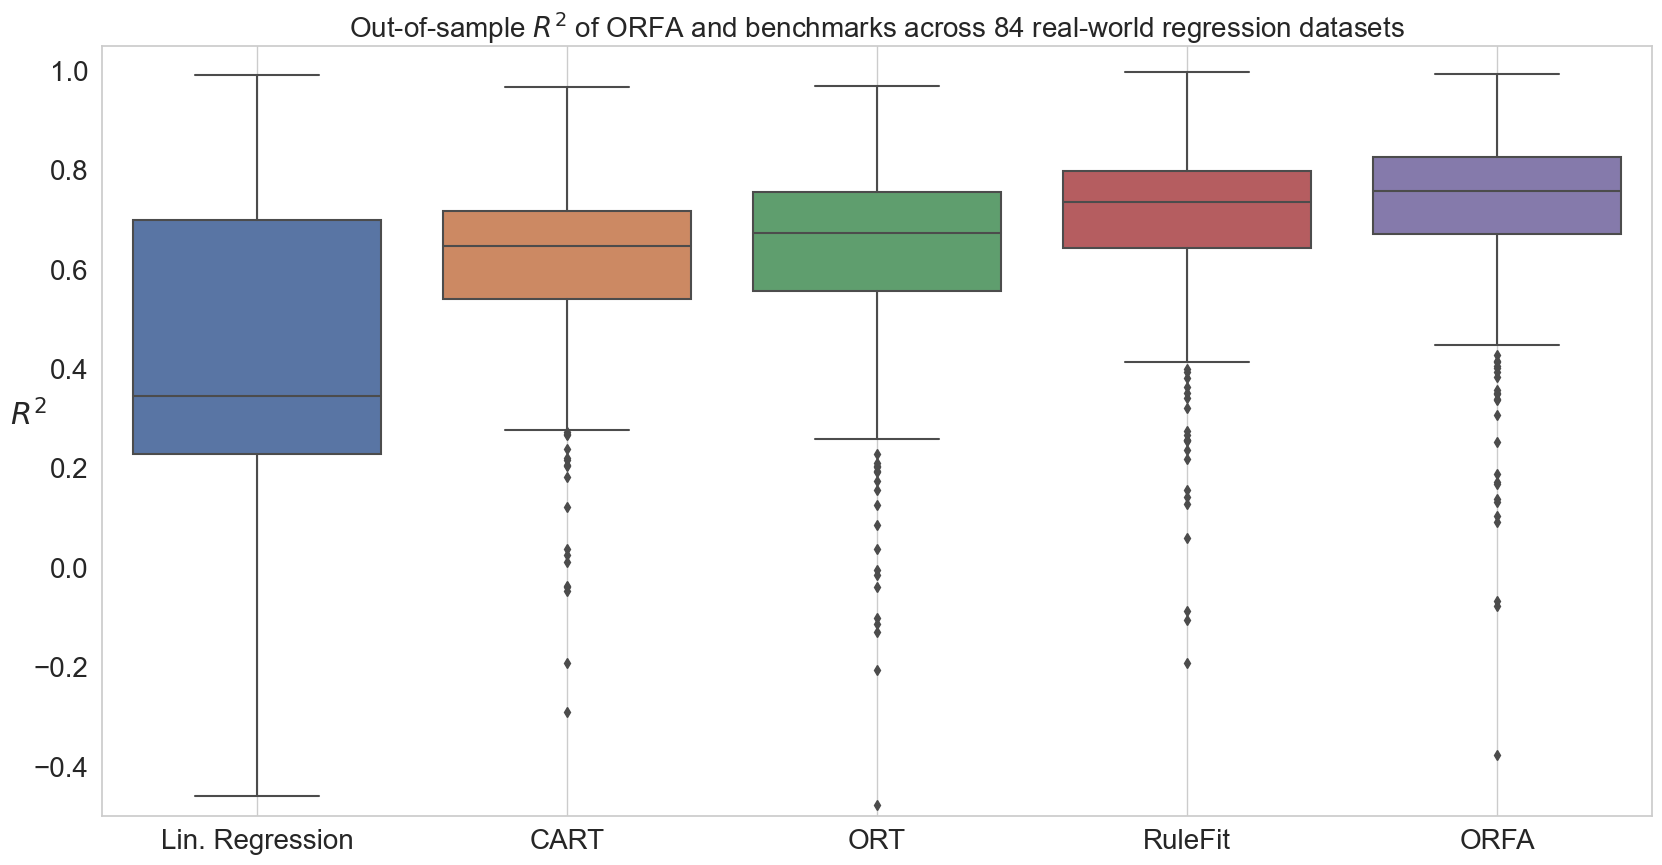

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots()

fig.set_size_inches(20, 10)

sns.boxplot(data = means)

ax.set_ylim([-0.5, 1.05])
sns.set_style("whitegrid")
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# ax.set_ylabel(r"OOS $R^2$")
ax.tick_params(labelsize = 20)
ax.grid()
ax.set_ylabel(r"$R^2$", rotation = 0, fontsize = 22)
ax.set_title(r"Out-of-sample $R^2$ of ORFA and benchmarks across 84 real-world regression datasets", fontsize = 20)

In [87]:
import scipy.stats as stats
stats.ttest_ind(a=means.iloc[:, -1], b=means.iloc[:, -2], equal_var=True)

Ttest_indResult(statistic=1.2420396467600914, pvalue=0.21456941966975507)

In [88]:
sns.set(rc={'figure.figsize':(16.7,15)})


In [89]:
means

,RG,Reg-CART,ORT,Reg-CART_LR_rules_and_features,ORT_LR_rules_and_features
197_cpu_act,0.709261,0.951963,0.955565,0.976615,0.977252
197_cpu_act,0.731948,0.946560,0.960046,0.969624,0.979739
197_cpu_act,0.700340,0.955681,0.956175,0.980341,0.980470
197_cpu_act,0.723448,0.952230,0.954450,0.977355,0.977722
197_cpu_act,0.738146,0.947717,0.951325,0.975835,0.976725
...,...,...,...,...,...
712_chscase_geyser1,0.817670,0.794360,0.761316,0.809439,0.792623
712_chscase_geyser1,0.774982,0.735650,0.729360,0.737563,0.736727
712_chscase_geyser1,0.776349,0.718999,0.703419,0.741070,0.732626
712_chscase_geyser1,0.839543,0.832084,0.811017,0.832649,0.799775


In [90]:
means.iloc[:, 0].shape

(420,)

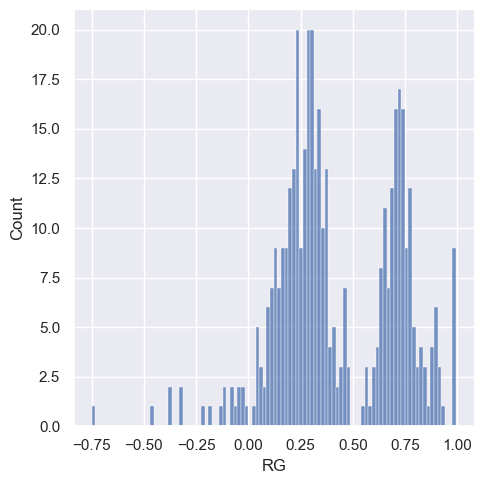

In [91]:
sns.displot(means.iloc[:, 0], bins = 100)

In [158]:
means.mean(level = 0).sort_index().index

/var/folders/q6/czkds0m930qfg8g6_k7km9cm0000gp/T/ipykernel_45889/4203701909.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  means.mean(level = 0).sort_index().index


Index(['197_cpu_act', '207_autoPrice', '210_cloud', '225_puma8NH',
       '227_cpu_small', '228_elusage', '229_pwLinear', '230_machine_cpu',
       '503_wind', '529_pollen', '547_no2', '556_analcatdata_apnea2',
       '557_analcatdata_apnea1', '560_bodyfat', '561_cpu', '562_cpu_small',
       '573_cpu_act', '579_fri_c0_250_5', '581_fri_c3_500_25',
       '582_fri_c1_500_25', '583_fri_c1_1000_50', '584_fri_c4_500_25',
       '586_fri_c3_1000_25', '589_fri_c2_1000_25', '590_fri_c0_1000_50',
       '591_fri_c1_100_10', '592_fri_c4_1000_25', '593_fri_c1_1000_10',
       '594_fri_c2_100_5', '595_fri_c0_1000_10', '596_fri_c2_250_5',
       '597_fri_c2_500_5', '598_fri_c0_1000_25', '599_fri_c2_1000_5',
       '601_fri_c1_250_5', '602_fri_c3_250_10', '603_fri_c0_250_50',
       '604_fri_c4_500_10', '605_fri_c2_250_25', '606_fri_c2_1000_10',
       '607_fri_c4_1000_50', '608_fri_c3_1000_10', '609_fri_c0_1000_5',
       '611_fri_c3_100_5', '612_fri_c1_1000_5', '613_fri_c3_250_5',
       '615_fri

In [177]:
datasets_tables = ['207_autoPrice', '210_cloud', '197_cpu_act', 
                   '503_wind', '529_pollen', '560_bodyfat', '581_fri_c3_500_25',
                   '712_chscase_geyser1', '556_analcatdata_apnea2', '547_no2',
                   '228_elusage', '225_puma8NH', '695_chatfield_4', '706_sleuth_case1202',
                   '229_pwLinear', '562_cpu_small','663_rabe_266'
                   ]

In [178]:
means[means.index.isin(datasets_tables)].groupby(level = 0).mean().round(3)

,Lin. Regression,CART,ORT,RuleFit,ORFA
197_cpu_act,0.721,0.951,0.956,0.976,0.978
207_autoPrice,0.759,0.847,0.879,0.806,0.874
210_cloud,0.803,0.642,0.479,0.636,0.786
225_puma8NH,0.375,0.567,0.601,0.571,0.608
228_elusage,0.747,0.717,0.584,0.712,0.599
229_pwLinear,0.710,0.780,0.762,0.820,0.822
503_wind,0.754,0.663,0.667,0.754,0.753
529_pollen,0.791,0.470,0.495,0.791,0.789
547_no2,0.483,0.371,0.377,0.463,0.459
556_analcatdata_apnea2,0.193,0.845,0.852,0.836,0.844


In [179]:
means[means.index.isin(datasets_tables)].groupby(level = 0).mean().round(3).to_latex("results.txt")

/var/folders/q6/czkds0m930qfg8g6_k7km9cm0000gp/T/ipykernel_45889/764533071.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  means[means.index.isin(datasets_tables)].groupby(level = 0).mean().round(3).to_latex("results.txt")


In [174]:
means.groupby(level = 0).mean().round(3).mean(axis = 0).round(3).T

Lin. Regression    0.424
CART               0.625
ORT                0.633
RuleFit            0.707
ORFA               0.724
dtype: float64